In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx

def seqmatch(seq1, seq2):
  overall = 0
  overlap = 0
  for pos in range(len(seq1)):
    overall+=1
    if seq1[pos] == seq2[pos]:
      overlap+=1
  return overlap/overall

In [6]:
rs1 = 'GAAUGCUGCCAACCGUGCGGGCUAAUUGGCAGACUGAGCU'.replace('U', 'T')

In [7]:
#Collect all sequences into one list
all_seqs = []
for round in range(1,7):
  all_seqs.append(open('Round'+str(round)+'_Correct_BPS_g1counts.txt').readlines())

#Save clustering assignments and peak sequences in a list 
clustering = open('PPP_r6_clusters.csv').readlines()[1:]
peak_seqs = []
for cluster in range(1,11):
  for seq in clustering:
    if int(seq.split(',')[1])==cluster:
      peak_seqs.append(seq.split(',')[0])
      break

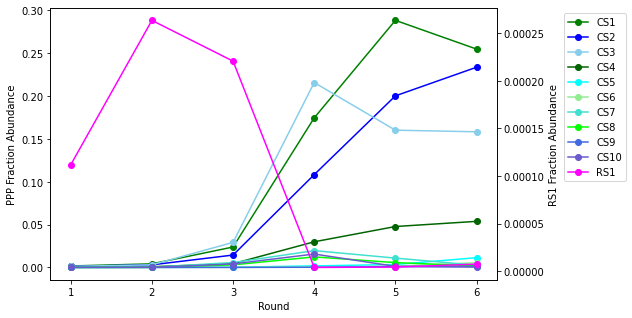

In [8]:
#Count each peak in each round
all_peak_counts = []
for peak in peak_seqs:
  counts = []
  for round in range(len(all_seqs)):
    if peak+'\n' in all_seqs[round]:
      counts.append(int(all_seqs[round][all_seqs[round].index(peak+'\n')-1][1:]))
    else:
      counts.append(0)
  all_peak_counts.append(counts)
#Count RS1 in each round
all_rs1_counts = []
for round in range(len(all_seqs)):
  if rs1+'\n' in all_seqs[round]:
    all_rs1_counts.append(int(all_seqs[round][all_seqs[round].index(rs1+'\n')-1][1:]))
  else:
    all_rs1_counts.append(0)
#Find total counts
all_total_counts = []
for round in range(len(all_seqs)):
  total_counts = 0
  for count in all_seqs[round][::2]:
    total_counts+=(int(count[1:]))
  all_total_counts.append(total_counts)
#Plot the dynamics
palate = ['green', 'blue', 'skyblue', 'darkgreen', 'cyan', 'lightgreen', 'turquoise', 'lime', 'royalblue', 'slateblue']

fig, ax1 = plt.subplots(figsize = (8,5))

lns = []
ax2 = ax1.twinx()
counter = -1
for seq in all_peak_counts:
  counter+=1
  lns+= ax1.plot(range(1,7), np.array(seq)/np.array(all_total_counts), marker = 'o', color = palate[counter], label = 'CS'+str(1+all_peak_counts.index(seq)))
lns+= ax2.plot(range(1,7), np.array(all_rs1_counts)/np.array(all_total_counts), marker = 'o', color = 'magenta', label = 'RS1')

ax1.set_xlabel('Round')
ax1.set_ylabel('PPP Fraction Abundance')
ax2.set_ylabel('RS1 Fraction Abundance')

# added these three lines
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0, bbox_to_anchor = (1.3,1))

plt.show()

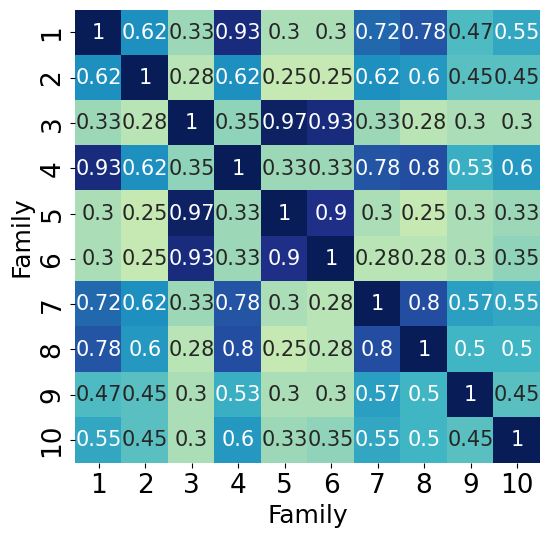

In [9]:
all_overlap = []
for seq1 in peak_seqs:
  overlap = []
  for seq2 in peak_seqs:
    overlap.append(seqmatch(seq1, seq2))
  all_overlap.append(overlap)

yticklabels = list(range(1, 11))
xticklabels = list(range(1, 11))

fig = plt.figure(num=1, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='k')


ax = sns.heatmap(all_overlap, cbar=False, annot=True, annot_kws={"fontsize":15}, cmap="YlGnBu", yticklabels=yticklabels ,xticklabels=xticklabels,  vmin=0, vmax=1)
ax.set_ylabel('Family', fontsize=18)
ax.set_xlabel('Family', fontsize=18)
    
ax.tick_params(axis='both', which='major', labelsize=19)
ax.tick_params(axis='both', which='minor', labelsize=19)



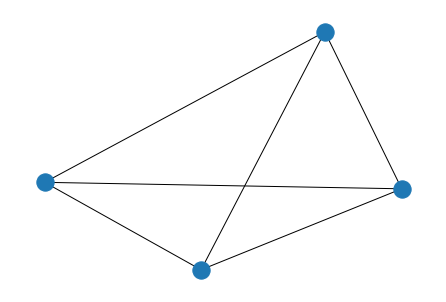

In [10]:
DistMatrix =np.array([[0,      0.3,    0.4,    0.7],[0.3,    0,      0.9,    0.2],[0.4,    0.9,    0,      0.1],[0.7,    0.2,    0.1,    0] ])
G = G=nx.from_numpy_matrix(DistMatrix)
nx.draw(G)

In [15]:
#!pip install Levenshtein
from Levenshtein import distance as levenshtein_distance

high_counts = []
for seq in range(len(all_seqs[-1][1::2])):
  if int(all_seqs[-1][::2][seq][1:])>10:
    high_counts.append(all_seqs[-1][1::2][seq])
len(high_counts)

In [79]:
#Connection Matrix
connections = [ [ 0 for i in range(len(high_counts)) ] for j in range(len(high_counts)) ]
for seq2 in range(len(high_counts)):
  for seq1 in range(len(high_counts)):
    if int(seqmatch(high_counts[seq1], high_counts[seq2])*len(high_counts[seq1])) == (len(high_counts[seq1])-1):
      connections[seq1][seq2] = 1
#Remove points with 0 connections
counter = -1
for row in connections:
  counter+=1
  if sum(row) < 10:
    np.delete(connections, counter, axis = 0)
    np.delete(connections, counter, axis = 1)

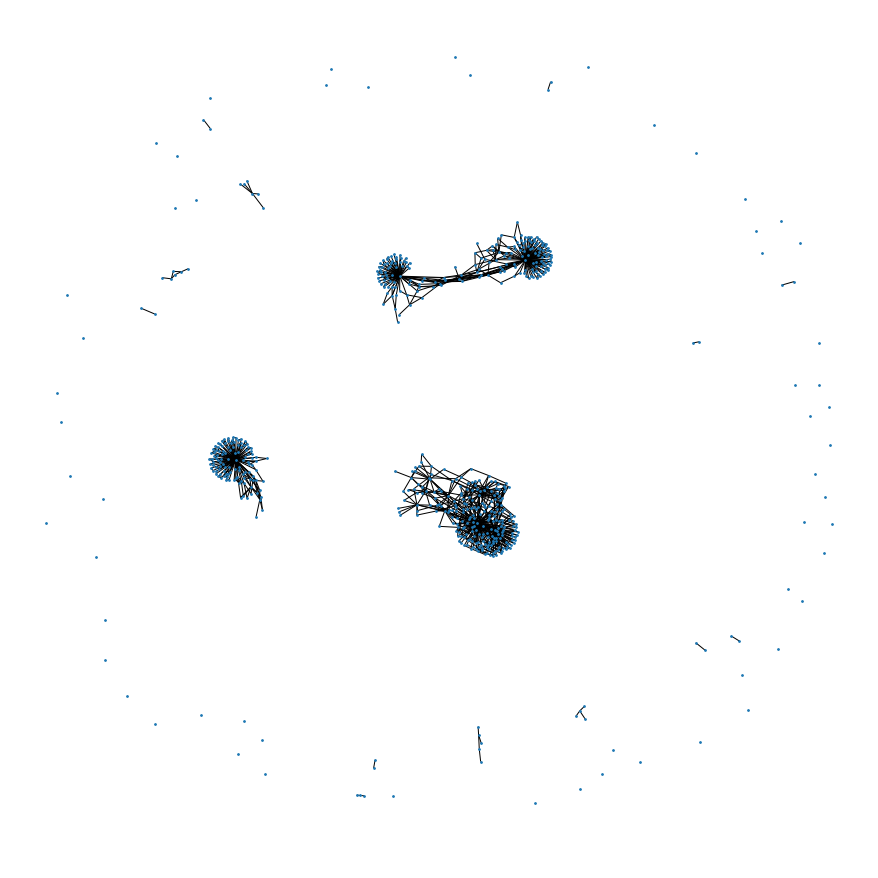

In [80]:
G = nx.from_numpy_matrix(np.array(connections))  
plt.figure(figsize=(12,12)) 
nx.draw(G, node_size = 3, with_labels=False) 

TypeError: ignored